In [1]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_palette('icefire')

import warnings
warnings.filterwarnings('ignore')

import pickle

In [2]:
index = 'ATX'
root = f'../models/{index}'

In [3]:
results = []
for path in glob.glob(f'{root}/*/*/*'):
    try:
        with open(os.path.join(path, 'project_metrics-1.pkl'), 'rb') as f:
            data = pickle.load(f)
            
        [index, window, model_config, commodity] = path.split('/')[2:]
        base_model = 'Peephole_LSTM' if model_config.startswith('Peephole_LSTM') else ('GRU' if 'GRU' in model_config else 'LSTM')
        model_config = model_config.replace(f'{base_model}_', '').replace(f'{base_model}', '')
        r = dict(index = index, window = window, base_model = base_model, model_config = model_config, commodity = commodity)
        r.update(data)
        results.append(r)
    except:
        print(path)

../models/ATX/28/Peephole_LSTM_garch/with_commodity_prices


In [4]:
df = pd.DataFrame(results)
df['window'] = df['window'].apply(int)
df.head()

,index,window,base_model,model_config,commodity,mae,mse,rmse,mad,hmse,hmae,mape,r2_hetro,aic,bic,r2
0,ATX,7,Peephole_LSTM,garch_gjr_garch,without_commodity_prices,0.004485,0.000041,0.006381,0.004701,8.631449,6.047860,0.447810,0.012490,-3751.310724,-3742.873524,-0.218019
1,ATX,7,Peephole_LSTM,garch_gjr_garch,with_commodity_prices,0.004649,0.000044,0.006669,0.004872,11.293804,7.866127,0.456046,0.010364,-3734.056923,-3725.627706,-0.327028
2,ATX,7,GRU,garch,without_commodity_prices,0.002674,0.000015,0.003844,0.004460,6.302103,4.340276,0.261918,0.690805,-4334.239664,-4325.802464,0.558123
3,ATX,7,GRU,garch,with_commodity_prices,0.002859,0.000018,0.004200,0.004438,6.139991,4.163593,0.252731,0.683677,-4304.343855,-4295.914638,0.473524
4,ATX,7,Peephole_LSTM,garch_egarch,without_commodity_prices,0.004260,0.000032,0.005691,0.004683,4.949591,3.622659,0.460715,0.075367,-3784.337239,-3775.900039,0.031258


#### Effect of training with commodity prices

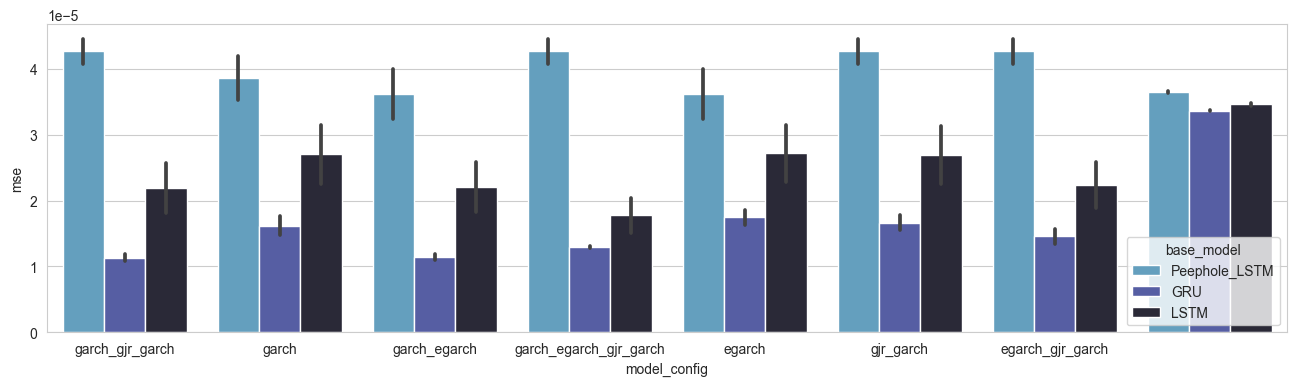

In [24]:
plt.figure(figsize = (16, 4))
sns.barplot(data = df[(df['window'] == 7)], x = 'model_config', y = 'mse', hue = 'base_model')
plt.show()

In [25]:
df['model_config'].unique()

array(['garch_gjr_garch', 'garch', 'garch_egarch',
       'garch_egarch_gjr_garch', 'egarch', 'gjr_garch',
       'egarch_gjr_garch', ''], dtype=object)

In [ ]:
order = ['', 
         'garch', 
         'egarch',
         'gjr_garch',
         'garch_egarch',
         'garch_gjr_garch',
         'egarch_gjr_garch',
         'garch_egarch_gjr_garch']